<a href="https://colab.research.google.com/github/Catia2021/Projeto3-MachineLearnig-Diabetes/blob/main/Projeto_MachineLearnig__Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tema do Projeto: Diabetes

#Apresentação dos Dados

Neste estudo serão utilizados dados coletados do repositório Kaggle disponibilizados no seguinte link: (https://www.kaggle.com/mathchi/diabetes-data-set 

Com base neste dataset, será feito um modelo preditivo para a possibilidade  de ter ou não diabetes tipo 2


#Problema a ser resolvido

Identificar as mulheres que tem  potencial de desenvolver  diabetes  tipo 2



#Objetivos do Projeto

    Instalar e importar bibliotecas apropriadas

    Pré-processar os dados

    Estabelecer as Variáveis Previsoras e de Classe

    Realizar tratamento de atributos categóricos usando o LabelEncoder 

    Escalonar os Atributos

    Dividir a base de dados em Treinamento e Teste

    Treinar o algoritimo Naive Baiyes

    Testar o algoritmo utilizando a matriz de confusão, a função accuracy_score e a classification_report---Ve se farei isto


#Importando Bibliotecas e Dados

In [ ]:
! pip install pyod

In [ ]:
!pip  install plotly --upgrade

In [94]:
import pandas as pd  # biblioteca para manipulação de dados
import numpy as np # biblioteca para manipulação de  dados numéricos
import seaborn as sns # biblioteca para otimizar gráficos
import matplotlib.pyplot as plt # biblioteca para geração de gráficos
import plotly.express as px  # biblioteca para geração de gráficos interativos
import sklearn # bilioteca para subsidiar Machine Learning
import plotly.graph_objects as go # para concatenar graficos
from sklearn.preprocessing import StandardScaler #para escalonar variaveis
from sklearn.naive_bayes import GaussianNB #  para  usar o Kmeans
from sklearn.preprocessing import LabelEncoder #para transformar  variaveis
from sklearn.preprocessing import StandardScaler #para escalonar variaveis
from sklearn.compose import ColumnTransformer #para transformar variaveis
from sklearn.model_selection import train_test_split  #para dividir base de teste e treinamento
from sklearn.metrics import accuracy_score #para avaliar a acurácia
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from seaborn.categorical import boxplot
% matplotlib inline
from pyod. models.knn import KNN
from yellowbrick.classifier import ConfusionMatrix



In [5]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


#Pré-Processamento dos Dados

In [6]:
Diabetes = pd.read_csv ('/content/diabetes.csv')

In [7]:
print( ' Este dataset tem %s linhas e %s colunas' % (Diabetes.shape[0] , Diabetes.shape[1] ) )
Diabetes.head(10)

 Este dataset tem 768 linhas e 9 colunas


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Acima você pode conferir as primeiras linhas do dataset e o total de linhas e colunas. Como os dados podem causar certa confusão, será alterado o idioma dos  cabeçalhos das colunas.**

In [8]:
Diabetes.columns = ['Numero_De_Gravidezes','Taxa_De_Glicose',' Pressao_Arterial','Espessura_Da_Pele','Insulina_Serica','IMC',
                         'Taxa_De_Risco_Familiar','Idade','Resultado']

In [9]:
Diabetes.tail()

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Continuando a tratamento dos dados, será renomeado o registro das coluna Resultado para melhor compreensão. Antes de renomear, será necessário, verificar os registros que serão alterados. Para isto , usaremos a função unique.**

In [10]:
np.unique (Diabetes['Resultado'])

array([0, 1])

In [11]:
Diabetes ['Resultado']= Diabetes ['Resultado']. replace ( [0,1], ['Negativo','Positivo'])

**Visualizando após Renomear**

In [12]:
Diabetes.head(10)

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,Positivo
1,1,85,66,29,0,26.6,0.351,31,Negativo
2,8,183,64,0,0,23.3,0.672,32,Positivo
3,1,89,66,23,94,28.1,0.167,21,Negativo
4,0,137,40,35,168,43.1,2.288,33,Positivo
5,5,116,74,0,0,25.6,0.201,30,Negativo
6,3,78,50,32,88,31.0,0.248,26,Positivo
7,10,115,0,0,0,35.3,0.134,29,Negativo
8,2,197,70,45,543,30.5,0.158,53,Positivo
9,8,125,96,0,0,0.0,0.232,54,Positivo


**Vejamos um Resumo do Dataset**

In [13]:
Diabetes.describe()

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Como se observa,  a média de gravidezes é 3.8 e  a média das taxas de glicose está acima da  taxa normal. Mas a média da  pressão arterial está dentro da normalidade.O que não ocorre  com o IMC, que apresenta uma média que caracteriza obesidade tipo 1.**

**Após  este processamento inicial será  caracterizado os  tipos de variáveis e  seus  significados.**

In [14]:
Diabetes.dtypes

Numero_De_Gravidezes        int64
Taxa_De_Glicose             int64
 Pressao_Arterial           int64
Espessura_Da_Pele           int64
Insulina_Serica             int64
IMC                       float64
Taxa_De_Risco_Familiar    float64
Idade                       int64
Resultado                  object
dtype: object

**Se tem  8 variáveis Numéricas e 1 Categórica, assim classificadas:**

   Número de gravidez, Taxa de Glicose, Pressão Arterial, Espessura da Pele, Insulina Sérica, Idade : Numérica Discreta

   Taxa de Risco Familiar, IMC: Numérica Contínua

   Resultado : Categórica Ordinal

   

**Dicionário de Dados**


*   Número de gravidez: Número de vezes que engravidou  
*   Taxa de Glicose: Taxa de glicose  pós  teste de tolerância a glicose
*   Pressão Arterial: Valor da Presão arterial diastólica 
*   Espessura da Pele:Espessura da dobra da pele  do tríceps
*   Insulina Sérica: Valor de Insulina Sérica  de  2 horas
*   Idade: Idade da pessoa 
*   Taxa de Risco Familiar: Função que mostra a probabilidade de ter diabetes baseada na árvore  familiar 
*   IMC: Índice de massa corpórea
*   Resultado:  O 0 mostra que a pessoa não  desenvolveu diabetes. O 1 mostra que a pessoa desenvolveu diabetes


**Prosseguindo o processamento de dados, será analisado se há valores 
faltantes e inconsistentes**

In [15]:
Diabetes.isnull()

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [16]:
Diabetes.isnull().sum()

Numero_De_Gravidezes      0
Taxa_De_Glicose           0
 Pressao_Arterial         0
Espessura_Da_Pele         0
Insulina_Serica           0
IMC                       0
Taxa_De_Risco_Familiar    0
Idade                     0
Resultado                 0
dtype: int64

In [17]:
Diabetes.loc[Diabetes['Numero_De_Gravidezes']<0]

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado


In [18]:
Diabetes.loc[Diabetes['Taxa_De_Glicose']<=0]

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado
75,1,0,48,20,0,24.7,0.140,22,Negativo
182,1,0,74,20,23,27.7,0.299,21,Negativo
342,1,0,68,35,0,32.0,0.389,22,Negativo
349,5,0,80,32,0,41.0,0.346,37,Positivo
502,6,0,68,41,0,39.0,0.727,41,Positivo


In [19]:
Diabetes.loc[Diabetes['Insulina_Serica']<=0]

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado
0,6,148,72,35,0,33.6,0.627,50,Positivo
1,1,85,66,29,0,26.6,0.351,31,Negativo
2,8,183,64,0,0,23.3,0.672,32,Positivo
5,5,116,74,0,0,25.6,0.201,30,Negativo
7,10,115,0,0,0,35.3,0.134,29,Negativo
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,Positivo
762,9,89,62,0,0,22.5,0.142,33,Negativo
764,2,122,70,27,0,36.8,0.340,27,Negativo
766,1,126,60,0,0,30.1,0.349,47,Positivo


In [20]:
Diabetes.loc[Diabetes['Espessura_Da_Pele']<=0]

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado
2,8,183,64,0,0,23.3,0.672,32,Positivo
5,5,116,74,0,0,25.6,0.201,30,Negativo
7,10,115,0,0,0,35.3,0.134,29,Negativo
9,8,125,96,0,0,0.0,0.232,54,Positivo
10,4,110,92,0,0,37.6,0.191,30,Negativo
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,Positivo
758,1,106,76,0,0,37.5,0.197,26,Negativo
759,6,190,92,0,0,35.5,0.278,66,Positivo
762,9,89,62,0,0,22.5,0.142,33,Negativo


In [21]:
Diabetes.loc[Diabetes['IMC']<0]

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado


In [22]:
Diabetes.loc[Diabetes['Taxa_De_Risco_Familiar']<0]

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado


In [23]:
Diabetes.loc[Diabetes['Idade']<0]

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Espessura_Da_Pele,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado


In [ ]:
Diabetes.loc[Diabetes[' Pressao_Arterial']<=0]

**Verificando  se há  Registros  Desbalanceados na Variável Target**

In [62]:
np.unique(Diabetes['Resultado'],return_counts=True)

(array(['Negativo', 'Positivo'], dtype=object), array([500, 268]))

**Apesar  de haver uma diferença na  quantidade de registro não  será considerado que  há  dados  Desbalanceados, então, não será necessário  fazer o Balanceamento.**

** E  como foram observados valores inconsistentes nas tabelas IMC, taxa de glicose, Pressão  arterial e Espessura da Pele. Serão tratados os dados, porém,antes, é importante visualizar estas inconsistências o que  referenda  ainda  mais os  achados.**

#Visualizando Gráficos

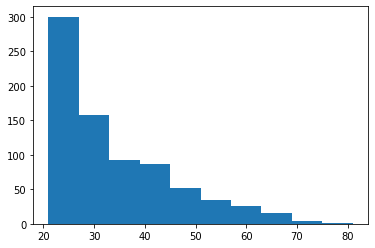

In [25]:
plt.hist(x=Diabetes['Idade']);

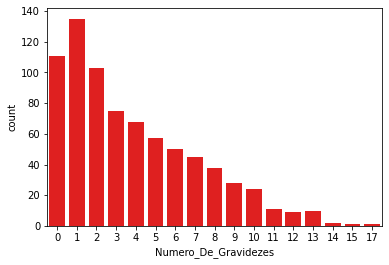

In [26]:
sns.countplot(x= Diabetes['Numero_De_Gravidezes'],color='red')

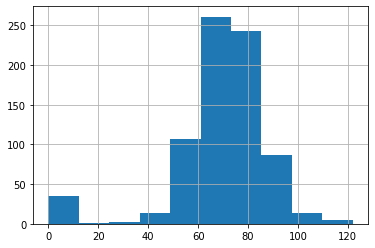

In [27]:
Diabetes[" Pressao_Arterial"].hist()

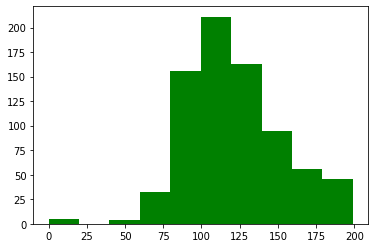

In [28]:
plt.hist(x=Diabetes['Taxa_De_Glicose'],color='green');

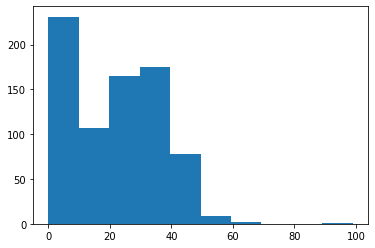

In [29]:
plt.hist(x=Diabetes['Espessura_Da_Pele']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



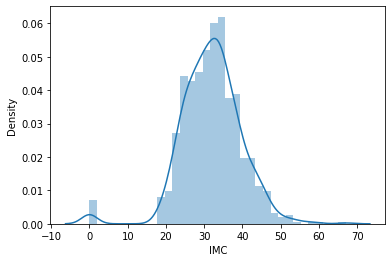

In [30]:
sns.distplot(Diabetes['IMC']);

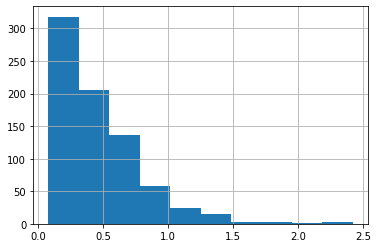

In [31]:
Diabetes['Taxa_De_Risco_Familiar'].hist()

In [32]:
Grafico = Diabetes['Resultado'].value_counts()

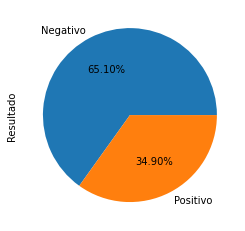

In [33]:
Grafico.plot(kind='pie', autopct='%1.2f%%')

**Baseado na  análise dos gráficos acima e  correlacionando com  a descrição geral dos dados, se percebe  que é necessário  retirar a coluna Espessura da pele. E nas  colunas  Pressão Arterial, Taxa de Glicose e IMC,  os valores inconsistentes serão mantidos, vistos  que as médias observadas estão de acordo com os valores previstos e  há poucos  valores  inconsistentes.**

In [34]:
Diabetes = Diabetes.drop('Espessura_Da_Pele', axis=1)

In [35]:
Diabetes

,Numero_De_Gravidezes,Taxa_De_Glicose,Pressao_Arterial,Insulina_Serica,IMC,Taxa_De_Risco_Familiar,Idade,Resultado
0,6,148,72,0,33.6,0.627,50,Positivo
1,1,85,66,0,26.6,0.351,31,Negativo
2,8,183,64,0,23.3,0.672,32,Positivo
3,1,89,66,94,28.1,0.167,21,Negativo
4,0,137,40,168,43.1,2.288,33,Positivo
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,Negativo
764,2,122,70,0,36.8,0.340,27,Negativo
765,5,121,72,112,26.2,0.245,30,Negativo
766,1,126,60,0,30.1,0.349,47,Positivo


**Verificando Outliers**

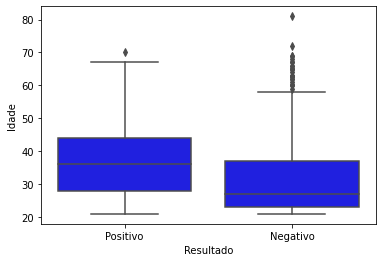

In [36]:
sns.boxplot(x='Resultado',y='Idade',data=Diabetes,color= 'blue')

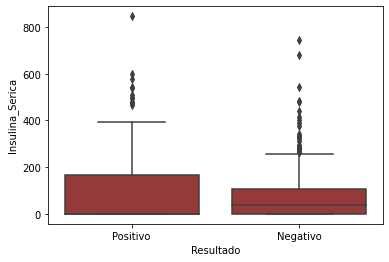

In [37]:
sns.boxplot(x='Resultado',y='Insulina_Serica',data=Diabetes,color= 'brown')

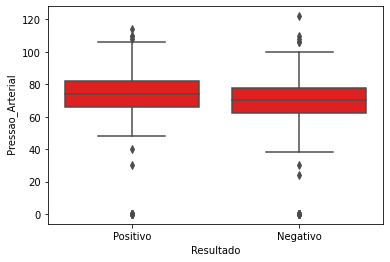

In [38]:
sns.boxplot(x='Resultado',y=" Pressao_Arterial",data=Diabetes,color= 'red')

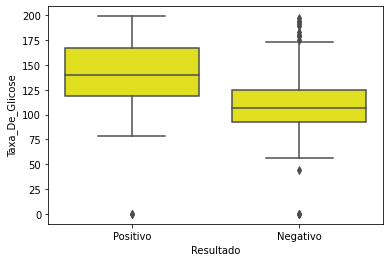

In [39]:
sns.boxplot(x= 'Resultado' ,y='Taxa_De_Glicose',data=Diabetes,color= 'yellow')

**Como se percebe há outliers  em todas os atributos. Passaremos, então, para avaliar  com termos mais exatos, utilizando a biblioteca PyOd.**

In [40]:
detector = KNN()
detector.fit(Diabetes.iloc[:,0:7])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
previsores = detector.labels_
previsores

In [42]:
np.unique( previsores,return_counts=True)

(array([0, 1]), array([691,  77]))

Foram detectados 77 outliers. O número 0 representa a não presença de outliers e o 1 a presença.

Verificando a confiabilidade dos previsores.

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

In [45]:
outliers =[]
for i in range(len(previsores)):
   if previsores[i]== 1:
     outliers.append(i)

In [46]:
print(outliers)

[8, 9, 13, 40, 43, 53, 54, 73, 75, 106, 111, 125, 139, 153, 162, 177, 182, 186, 206, 220, 223, 228, 231, 247, 248, 254, 258, 279, 286, 296, 323, 332, 335, 342, 349, 359, 360, 370, 375, 388, 392, 409, 412, 415, 453, 458, 459, 486, 487, 498, 502, 506, 519, 537, 545, 546, 548, 561, 574, 584, 597, 604, 606, 612, 645, 647, 655, 662, 672, 673, 679, 695, 707, 710, 713, 715, 753]


**Estes são os indices que se encontram os outliers.**

**Há muitos outliers como verificado, porém, como se trata de um Projeto de treino, não serão alterados os registros, embora possa  levar à interferência no treinamento do algoritmo.**

#Dividindo as Variáveis Previsoras e de Classe

**Serão  criados  duas variáveis: a X  será a  variável  previsora e a Y  a de classe **

In [47]:
X_Diabetes = Diabetes.iloc[:,0:7].values

In [48]:
X_Diabetes

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [49]:
type(X_Diabetes)

numpy.ndarray

In [50]:
type(Diabetes)

pandas.core.frame.DataFrame

In [51]:
Y_Diabetes = Diabetes.iloc[:,7].values

In [ ]:
Y_Diabetes

In [53]:
type(Y_Diabetes)

numpy.ndarray

# Tratando atributos Categóricos com Label Encoder

In [56]:
label_encoder_Resultado = LabelEncoder()

In [57]:
Resultado=label_encoder_Resultado.fit_transform(Y_Diabetes)

In [ ]:
Resultado

#Escalonando os Atributos

In [73]:
X_Diabetes[:,0].min()

-1.1418515161634994

In [74]:
X_Diabetes[:,0].max()

3.906578350084603

In [78]:
X_Diabetes[:,1].min()

-3.78365371377963

In [80]:
X_Diabetes[:,1].max()

2.4444782063079162

In [ ]:
X_Diabetes[:,3].min()

In [81]:
X_Diabetes[:,3].max()

6.65283937836846

In [82]:
X_Diabetes[:,4].min()

-4.060473872668307

In [83]:
X_Diabetes[:,4].max()

6.65283937836846

Será  necessário fazer a Padronização dos Valores, pois há valores discrepantes entre si.

In [59]:
scaler_Diabetes = StandardScaler()
X_Diabetes = scaler_Diabetes.fit_transform(X_Diabetes)

In [60]:
X_Diabetes

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

**Feito a Padronização, passaremos à divisão das bases de dados em Treinamento e Teste**

#Divisão Base de Treinamento e Teste

**Serão criados 4  variáveis , duas para  treinamento e  2 para teste**

In [64]:
X_Diabetes_treinamento, X_Diabetes_teste,Y_Diabetes_treinamento,Y_Diabetes_teste = train_test_split(X_Diabetes,Y_Diabetes, test_size=0.25,random_state=0)

**Verificando as  variáveis criadas.**

In [65]:
X_Diabetes_treinamento.shape

(576, 7)

In [66]:
X_Diabetes_teste.shape

(192, 7)

In [67]:
Y_Diabetes_treinamento.shape

(576,)

In [68]:
Y_Diabetes_teste.shape

(192,)

#Treinando o Algoritmo  e Testando

In [69]:
naive_risco_Diabetes = GaussianNB()

In [70]:
naive_risco_Diabetes.fit(X_Diabetes_treinamento, Y_Diabetes_treinamento)

GaussianNB()

In [ ]:
previsao = naive_risco_Diabetes.predict(X_Diabetes_teste)
previsao

In [ ]:
Y_Diabetes_teste

#Matriz de Confusão

In [86]:
confusion_matrix(Y_Diabetes_teste,previsao)

array([[116,  14],
       [ 29,  33]])

0.7760416666666666

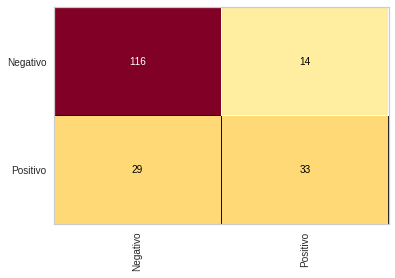

In [95]:
cm=ConfusionMatrix(naive_risco_Diabetes)
cm.fit(X_Diabetes_treinamento,Y_Diabetes_treinamento)
cm.score(X_Diabetes_teste, Y_Diabetes_teste)

116 mulheres que tem diabetes, foram classificadas corretamente.
14 mulheres com diabetes, foram classificadas erradamente.
29 mulheres que não tem diabetes, foram classificadas erradamente.
33 mulheres que não tem diabetes, foram classificadas  corretamente


**Avaliando a Precisão,  a Sensibilidade, F1-Score  e  a Acurácia**

In [ ]:
print(classification_report(Y_Diabetes_teste,previsao))

              precision    recall  f1-score   support

    Negativo       0.80      0.89      0.84       130
    Positivo       0.70      0.53      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192



In [ ]:
accuracy_score (Y_Diabetes_teste,previsao)

0.7760416666666666

**A acurácia não é  boa  pois  como se trata de diagnosticar uma  doença, o percentual deveria estar em torno de 90%. Porém percebe-se uma sensibilidade melhor  em detectar  quem não é  diabético do que  quem é diabético. Neste caso o recall é muito  baixo, apesar de na precisão de identificar corretamente  quem tem diabetes, o algoritmo  fica melhor( 0.70).**

# Concluindo

**O algoritmo treinado não apresentou uma boa sensibilidade  para  diagnosticar  as mulheres  que tem diabetes tipo 2. Logo, se faz necessário testar outros algoritmos.**